<h1>Tuberculosis</h1>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [22]:
df_air23 = pd.read_csv("illinois-2023-air-pollution---particulate-matter-place-sort.csv")
df_air23.rename(columns={'County Value': 'County Value 23', 'Z-Score': 'Z-Score 23'}, inplace=True)

df_air22 = pd.read_csv("illinois-2022-air-pollution---particulate-matter-place-sort.csv")
df_air22.rename(columns={'County Value': 'County Value 22', 'Z-Score': 'Z-Score 22'}, inplace=True)

df_air21 = pd.read_csv("illinois-2021-air-pollution---particulate-matter-place-sort.csv")
df_air21.rename(columns={'County Value': 'County Value 21', 'Z-Score': 'Z-Score 21'}, inplace=True)

df_air23

,County,County Value 23,Z-Score 23
0,Illinois,8.8,NaN
1,Adams,8.3,-0.96
2,Alexander,8.8,-0.16
3,Bond,8.6,-0.48
4,Boone,9.5,0.95
...,...,...,...
98,Whiteside,9.4,0.79
99,Will,9.8,1.43
100,Williamson,8.9,0.00
101,Winnebago,10.3,2.22


merge the 3 air pollution data frames

In [23]:
df_22_23 = pd.merge(df_air22, df_air23, on = 'County', how = 'outer')
df_22_23
df_air = pd.merge(df_air21, df_22_23, on = 'County', how = 'outer')
df_air

,County,County Value 21,Z-Score 21,County Value 22,Z-Score 22,County Value 23,Z-Score 23
0,Adams,8.6,-0.22,9.3,-0.40,8.3,-0.96
1,Alexander,9.2,1.02,9.5,-0.01,8.8,-0.16
2,Bond,8.7,-0.01,9.3,-0.40,8.6,-0.48
3,Boone,9.1,0.81,9.6,0.19,9.5,0.95
4,Brown,8.1,-1.25,8.9,-1.20,7.9,-1.59
...,...,...,...,...,...,...,...
98,Whiteside,8.9,0.40,9.6,0.19,9.4,0.79
99,Will,8.0,-1.45,10.1,1.19,9.8,1.43
100,Williamson,9.2,1.02,9.5,-0.01,8.9,0.00
101,Winnebago,7.8,-1.86,9.8,0.59,10.3,2.22


In [33]:
df_tub23 = pd.read_csv("2023 Illinois Tuberculosis Case Rates per 100,000 Population (1).csv")
df_tub23.rename(columns={'Cases': 'Cases 23', 'Case Rate per 100,000 Population': '(23)Case Rate/100,000'}, inplace=True)

df_tub22 = pd.read_csv("2022 Illinois Tuberculosis Case Rates per 100,000 Population.csv")
df_tub22.rename(columns={'Cases': 'Cases 22', 'Case Rate per 100,000 Population': '(22)Case Rate/100,000'}, inplace=True)

df_tub21 = pd.read_csv("2021 Illinois Tuberculosis Case Rates per 100,000 Population.csv")
df_tub21.rename(columns={'Cases': 'Cases 21', 'Case Rate per 100,000 Population': '(21)Case Rate/100,000'}, inplace=True)

df_tub23

,County,Cases 23,"(23)Case Rate/100,000"
0,Adams,0,0
1,Alexander,0,0
2,Bond,0,0
3,Boone,0,0
4,Brown,0,0
...,...,...,...
98,Whiteside,1,Rate Suppressed
99,Will,15,2.15
100,Williamson,0,0
101,Winnebago,4,1.4


merge tuberculosis dataframes

In [35]:
df_tub_22_23 = pd.merge(df_tub22, df_tub23, on = 'County', how = 'outer')
df_tub_22_23
df_tub = pd.merge(df_tub21, df_tub_22_23, on = 'County', how = 'outer')
df_tub

,County,Cases 21,"(21)Case Rate/100,000",Cases 22,"(22)Case Rate/100,000",Cases 23,"(23)Case Rate/100,000"
0,Adams,0,0,0,0,0,0
1,Alexander,0,0,0,0,0,0
2,Bond,0,0,0,0,0,0
3,Boone,0,0,0,0,0,0
4,Brown,0,0,0,0,0,0
...,...,...,...,...,...,...,...
98,Whiteside,0,0,0,0,1,Rate Suppressed
99,Will,6,0.87,14,2.01,15,2.15
100,Williamson,3,Rate Suppressed,0,0,0,0
101,Winnebago,3,1.06,8,2.8,4,1.4


In [36]:
def merge_dataframes_by_county(df1, df2, county_column_df1='County', county_column_df2='County', keep_overlap_only=True):
    # Standardize county names to handle minor variations (e.g., lowercase, remove extra spaces)
    df1[county_column_df1] = df1[county_column_df1].str.strip().str.lower()
    df2[county_column_df2] = df2[county_column_df2].str.strip().str.lower()

    # Perform the merge using the standardized county names
    if keep_overlap_only:
        merged_df = pd.merge(df1, df2, left_on=county_column_df1, right_on=county_column_df2, how='inner') # inner join
    else:
        merged_df = pd.merge(df1, df2, left_on=county_column_df1, right_on=county_column_df2, how='outer')

    return merged_df

<h1>DF info</h1>

Tuberculosis Dataframe information / description

In [55]:
#print("--- DataFrame Info ---")
#print(df_tub.info())

print("\n--- Summary Statistics (Numerical Columns) ---")
print(df_tub.describe())

# changing columns from objects into strings
df_tub['County'] = df_tub['County'].astype("string")
df_tub['(21)Case Rate/100,000'] = df_tub['(21)Case Rate/100,000'].replace('Rate Suppressed', np.nan)
df_tub['(21)Case Rate/100,000'] = pd.to_numeric(df_tub['(21)Case Rate/100,000'])

df_tub['(22)Case Rate/100,000'] = df_tub['(22)Case Rate/100,000'].replace('Rate Suppressed', np.nan)
df_tub['(22)Case Rate/100,000'] = pd.to_numeric(df_tub['(22)Case Rate/100,000'])

df_tub['(23)Case Rate/100,000'] = df_tub['(23)Case Rate/100,000'].replace('Rate Suppressed', np.nan)
df_tub['(23)Case Rate/100,000'] = pd.to_numeric(df_tub['(23)Case Rate/100,000'])

print("--- DataFrame Info (After) ---")
print(df_tub.info())



--- Summary Statistics (Numerical Columns) ---
         Cases 21  (21)Case Rate/100,000    Cases 22    Cases 23
count  103.000000                   99.0  103.000000  103.000000
mean     2.456311                0.29697    2.893204    3.388350
std     11.704513               0.764162   13.489947   17.362475
min      0.000000                    0.0    0.000000    0.000000
25%      0.000000                    0.0    0.000000    0.000000
50%      0.000000                    0.0    0.000000    0.000000
75%      0.000000                    0.0    0.000000    0.000000
max     97.000000                   3.59  111.000000  154.000000
--- DataFrame Info (After) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   County                 103 non-null    string 
 1   Cases 21               103 non-null    int64  
 2   (21)Case Rate/100,0

Air Polution (Pm2.5) Data Frame Info / Description

In [69]:
#print("--- DataFrame Info ---")
#print(df_air.info())

#print("\n--- Summary Statistics (Numerical Columns) ---")
#print(df_air.describe())

df_air['County'] = df_air['County'].astype("string")

print("--- DataFrame Info (After) ---")
print(df_air.info())


--- DataFrame Info (After) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           103 non-null    string 
 1   County Value 21  103 non-null    float64
 2   Z-Score 21       102 non-null    float64
 3   County Value 22  103 non-null    float64
 4   Z-Score 22       102 non-null    float64
 5   County Value 23  103 non-null    float64
 6   Z-Score 23       102 non-null    float64
dtypes: float64(6), string(1)
memory usage: 5.8 KB
None


In [60]:
df_merge = merge_dataframes_by_county(df_air, df_tub)
df_merge

,County,County Value 21,Z-Score 21,County Value 22,Z-Score 22,County Value 23,Z-Score 23,Cases 21,"(21)Case Rate/100,000",Cases 22,"(22)Case Rate/100,000",Cases 23,"(23)Case Rate/100,000"
0,adams,8.6,-0.22,9.3,-0.40,8.3,-0.96,0,0.0,0,0.0,0,0.0
1,alexander,9.2,1.02,9.5,-0.01,8.8,-0.16,0,0.0,0,0.0,0,0.0
2,bond,8.7,-0.01,9.3,-0.40,8.6,-0.48,0,0.0,0,0.0,0,0.0
3,boone,9.1,0.81,9.6,0.19,9.5,0.95,0,0.0,0,0.0,0,0.0
4,brown,8.1,-1.25,8.9,-1.20,7.9,-1.59,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,whiteside,8.9,0.40,9.6,0.19,9.4,0.79,0,0.0,0,0.0,1,<NA>
98,will,8.0,-1.45,10.1,1.19,9.8,1.43,6,0.87,14,2.01,15,2.15
99,williamson,9.2,1.02,9.5,-0.01,8.9,0.00,3,<NA>,0,0.0,0,0.0
100,winnebago,7.8,-1.86,9.8,0.59,10.3,2.22,3,1.06,8,2.8,4,1.4


<h1>Visualizations</h1>

In [13]:
"""
plt.figure(figsize=(10, 8))
numerical_cols = df_air.select_dtypes(include=['number']).columns
sns.heatmap(df_air[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()"
"""

'\nplt.figure(figsize=(10, 8))\nnumerical_cols = df_air.select_dtypes(include=[\'number\']).columns\nsns.heatmap(df_air[numerical_cols].corr(), annot=True, cmap=\'coolwarm\')\nplt.title(\'Correlation Heatmap\')\nplt.show()"\n'

<h1>Models</h1>

<h3>Linear Regression</h3>

<h5>2021</h5>

In [74]:
#2021
df_merge_21 = df_merge[["County Value 21", "(21)Case Rate/100,000"]].dropna()
model_21 = LinearRegression()
ind = ["County Value 21"]
dep = "(21)Case Rate/100,000"
X_21 = df_merge_21[ind].values
y_21 = df_merge_21[dep].values
model_21.fit(X_21, y_21)

LinearRegression()

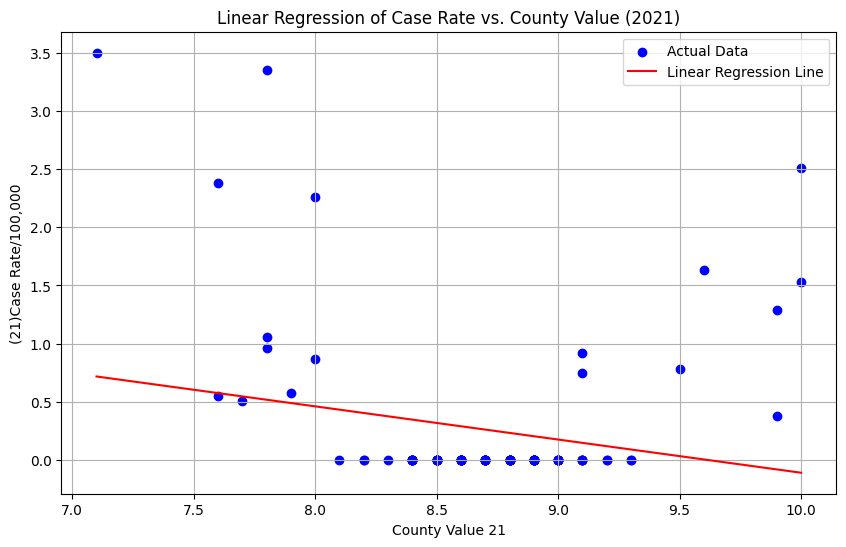

In [76]:
y_pred_21 = model_21.predict(X_21)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df_merge_21["County Value 21"], df_merge_21["(21)Case Rate/100,000"], color='blue', label='Actual Data')

sorted_indices = np.argsort(X_21.flatten())
plt.plot(X_21[sorted_indices], y_pred_21[sorted_indices], color='red', label='Linear Regression Line')

# Add labels and title
plt.xlabel("County Value 21")
plt.ylabel("(21)Case Rate/100,000")
plt.title("Linear Regression of Case Rate vs. County Value (2021)")
plt.legend()
plt.grid(True)
plt.show()

<h5>2022</h5>

In [77]:
#2022
df_merge_22 = df_merge[["County Value 22", "(22)Case Rate/100,000"]].dropna()
model_22 = LinearRegression()
ind = ["County Value 22"]
dep = "(22)Case Rate/100,000"
X_22 = df_merge_22[ind].values
y_22 = df_merge_22[dep].values
model_22.fit(X_22, y_22)

LinearRegression()

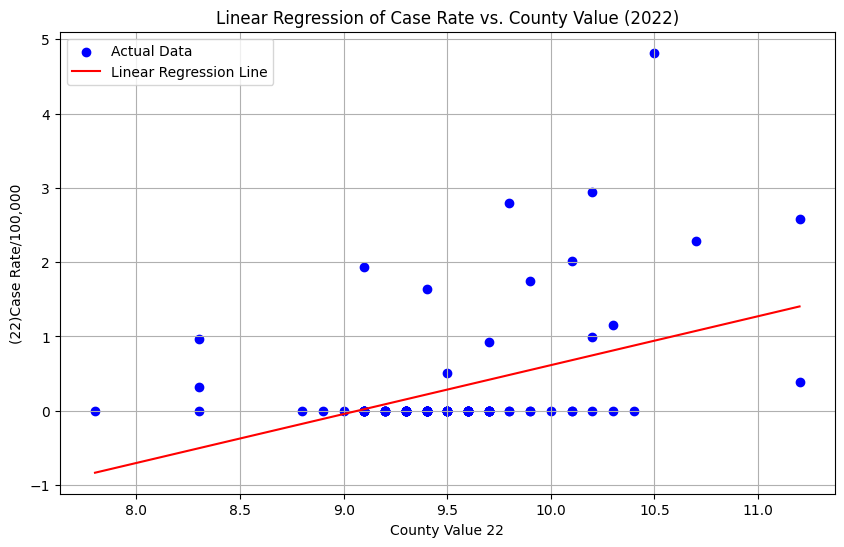

In [78]:
y_pred_22 = model_22.predict(X_22)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df_merge_22["County Value 22"], df_merge_22["(22)Case Rate/100,000"], color='blue', label='Actual Data')

sorted_indices = np.argsort(X_22.flatten())
plt.plot(X_22[sorted_indices], y_pred_22[sorted_indices], color='red', label='Linear Regression Line')

# Add labels and title
plt.xlabel("County Value 22")
plt.ylabel("(22)Case Rate/100,000")
plt.title("Linear Regression of Case Rate vs. County Value (2022)")
plt.legend()
plt.grid(True)
plt.show()

<h5>2023</h5>

In [79]:
#2023
df_merge_23 = df_merge[["County Value 23", "(23)Case Rate/100,000"]].dropna()
model_23 = LinearRegression()
ind = ["County Value 23"]
dep = "(23)Case Rate/100,000"
X_23 = df_merge_23[ind].values
y_23 = df_merge_23[dep].values
model_23.fit(X_23, y_23)

LinearRegression()

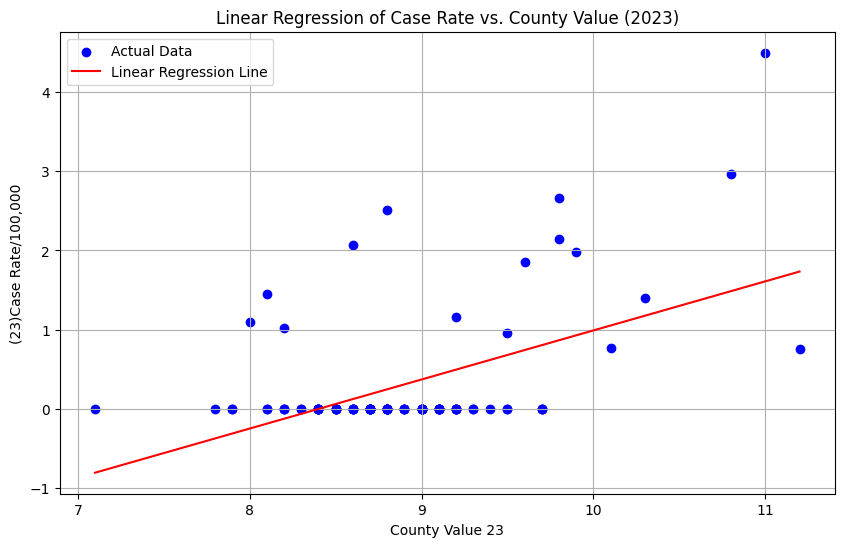

In [81]:
y_pred_23 = model_23.predict(X_23)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df_merge_23["County Value 23"], df_merge_23["(23)Case Rate/100,000"], color='blue', label='Actual Data')

sorted_indices = np.argsort(X_23.flatten())
plt.plot(X_23[sorted_indices], y_pred_23[sorted_indices], color='red', label='Linear Regression Line')

# Add labels and title
plt.xlabel("County Value 23")
plt.ylabel("(23)Case Rate/100,000")
plt.title("Linear Regression of Case Rate vs. County Value (2023)")
plt.legend()
plt.grid(True)
plt.show()

<h5>2021-2023</h5>

In [98]:
#making column with mean
rate_columns = ['(21)Case Rate/100,000', '(22)Case Rate/100,000', '(23)Case Rate/100,000']
for col in rate_columns:
    df_merge[col] = df_merge[col].replace('Rate Suppressed', np.nan).astype(float)
grouped_by_county = df_merge.groupby('County')
mean_case_rate_per_county = grouped_by_county[rate_columns].mean()
mean_case_rate_per_county['Mean Case Rate/100,000 (2021-2023)'] = mean_case_rate_per_county.mean(axis=1)
mean_case_rate_per_county = mean_case_rate_per_county[['Mean Case Rate/100,000 (2021-2023)']]
mean_case_rate_per_county = mean_case_rate_per_county.reset_index()
df_merge = pd.merge(df_merge, mean_case_rate_per_county, on='County', how='left')

#Calculate the average county value over 2021-2023
county_value_columns = ['County Value 21', 'County Value 22', 'County Value 23']
for col in county_value_columns:
    df_merge[col] = pd.to_numeric(df_merge[col], errors='coerce')
df_merge['Mean County Value (2021-2023)'] = df_merge[county_value_columns].mean(axis=1)

In [99]:
#2021-2023
model_mean = LinearRegression()
ind_mean = "Mean County Value (2021-2023)" 
dep_mean = "Mean Case Rate/100,000 (2021-2023)"

# Create df_regression_mean AFTER calculating the mean county value
df_regression_mean = df_merge[[ind_mean, dep_mean]].dropna()

X_mean = df_regression_mean[[ind_mean]].values  # Select as a single-column DataFrame
y_mean = df_regression_mean[dep_mean].values
model_mean.fit(X_mean, y_mean)


LinearRegression()

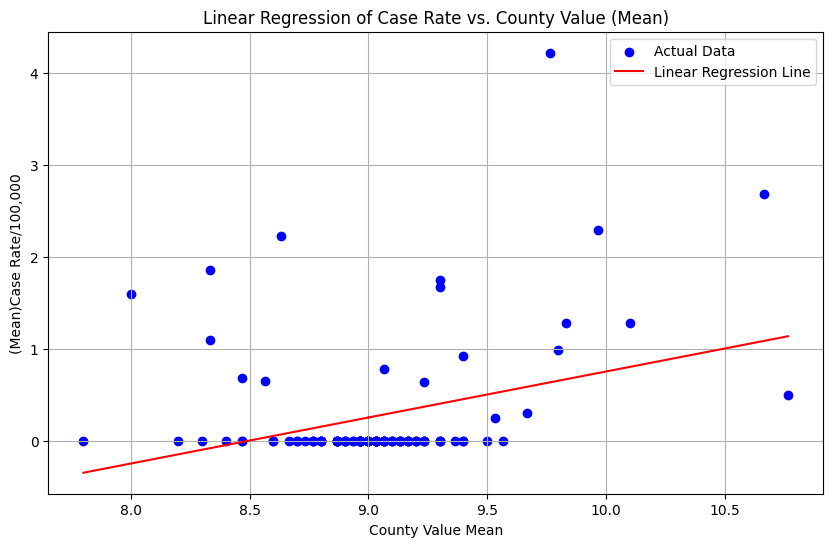

In [100]:
y_pred_mean = model_mean.predict(X_mean)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df_regression_mean["Mean County Value (2021-2023)"], df_regression_mean["Mean Case Rate/100,000 (2021-2023)"], color='blue', label='Actual Data')

sorted_indices = np.argsort(X_mean.flatten())
plt.plot(X_mean[sorted_indices], y_pred_mean[sorted_indices], color='red', label='Linear Regression Line')

# Add labels and title
plt.xlabel("County Value Mean")
plt.ylabel("(Mean)Case Rate/100,000")
plt.title("Linear Regression of Case Rate vs. County Value (Mean)")
plt.legend()
plt.grid(True)
plt.show()